In [1]:
import tensorflow as tf
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras import Model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import optimizers
import os

In [5]:
#顯示執行GPU
!nvidia-smi

Mon Nov  8 06:44:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir("/content/drive/Shareddrives/paper/NM6104038_NM6101098_GAN_Group5") #change to this path
print(os.getcwd())

Mounted at /content/drive/
/content/drive/Shareddrives/paper/NM6104038_NM6101098_GAN_Group5


In [2]:
class Discriminative(Model):
  def __init__(self):
    super(Discriminative, self).__init__()
    self.conv1 = Conv2D(256, 4,padding='same')
    self.leakyrelu1 = LeakyReLU()
    self.conv2 = Conv2D(256, 4,padding='same')
    self.leakyrelu2 = LeakyReLU()
    self.conv3 = Conv2D(256, 4,padding='same')
    self.leakyrelu3 = LeakyReLU()
    self.conv4 = Conv2D(512, 4,padding='same')
    self.leakyrelu4 = LeakyReLU()
    self.conv5 = Conv2D(1, 4,padding='same')
    self.leakyrelu5 = LeakyReLU()
    self.conv6 = Conv2D(1, 6,padding='same', activation='sigmoid')
  def call(self, x):
    x = self.conv1(x)
    x = self.leakyrelu1(x)
    x = self.conv2(x)
    x = self.leakyrelu2(x)
    x = self.conv3(x)
    x = self.leakyrelu3(x)
    x = self.conv4(x)
    x = self.leakyrelu4(x)
    x = self.conv5(x)
    x = self.leakyrelu5(x)
    return self.conv6(x)

In [3]:
class Generative(Model):
  def __init__(self):
    super(Generative, self).__init__()
    self.conv1 = Conv2D(172, 7,padding='same')
    self.leakyrelu1 = LeakyReLU()
    self.conv2 = Conv2D(256, 4,padding='same')
    self.leakyrelu2 = LeakyReLU()
    self.conv3 = Conv2D(512, 4,padding='same')
    self.leakyrelu3 = LeakyReLU()
    self.dilatedconv1 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu4 = LeakyReLU()
    self.dilatedconv2 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu5 = LeakyReLU()

    self.dilatedconv3 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu6 = LeakyReLU()
    self.dilatedconv4 = Conv2D(512, 3,(1,1),'same',None,(2,2))
    self.leakyrelu7  = LeakyReLU()

    self.transconv1 = Conv2DTranspose(256, 4,padding='same')
    self.leakyrelu8  = LeakyReLU()
    self.transconv2 = Conv2DTranspose(256, 4,padding='same')
    self.leakyrelu9  = LeakyReLU()

    self.conv4 = Conv2D(3, 7,padding='same')
    self.leakyrelu10 = LeakyReLU()
  def call(self, x):
      x1 = self.conv1(x)
      x2 = self.leakyrelu1(x1)
      x3 = self.conv2(x2)
      x4 = self.leakyrelu2(x3)
      x5 = self.conv3(x4)
      x6 = self.leakyrelu3(x5)
      x7 = self.dilatedconv1(x6)
      x8 = self.leakyrelu4(x7)
      x9 = self.dilatedconv2(x8)
      x10 = tf.add(x6,x9)
      x11 = self.leakyrelu5(x10)
      x12 = self.dilatedconv3(x11)
      x13 = self.leakyrelu6(x12)
      x14 = self.dilatedconv4(x13)
      x15 = tf.add(x11,x14)
      x16 = self.leakyrelu7(x15)
      x17 = self.transconv1(x16)
      x18 = self.leakyrelu8(x17)
      x19 = self.transconv2(x18)
      x20 = self.leakyrelu9(x19)
      x21 = self.conv4(x20)
      return self.leakyrelu10(x21)


In [ ]:
## 實際使用

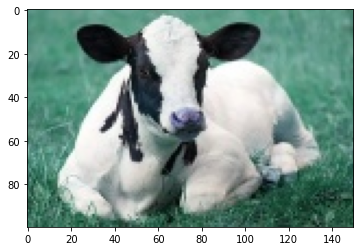

In [7]:
img = cv2.imread("./cow1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
input_shape = img.shape




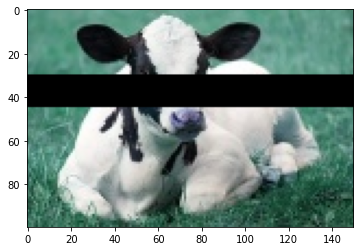

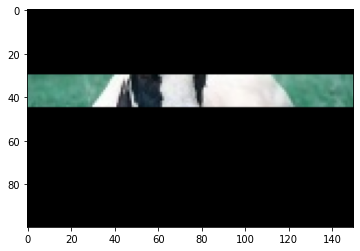

In [8]:
mask = np.ones(input_shape,dtype="int32")
mask[:][30:45][:] = 0
inv_mask = np.zeros(input_shape,dtype="int32")
inv_mask[:][30:45][:] = 1


maskimg = img * mask
inv_mask_img = img * inv_mask
plt.imshow(maskimg)
plt.show()
plt.imshow(inv_mask_img)
plt.show()

cv2.imwrite('1.jpg',img)
cv2.imwrite('2.jpg',maskimg)
cv2.imwrite('3.jpg',inv_mask_img)
mask_img = preprocess_input(maskimg)

In [9]:
#建構並顯示Generative架構
generator = Generative()
img_in = []
image = preprocess_input(img)
img_in.append(image)
img_in = np.array(img_in)
generator.build(img_in.shape)
generator.summary()

Model: "generative"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  25456     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  704768    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  2097664   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  2

In [ ]:
input = []
input.append(mask_img)
input = np.array(input)
#建構並顯示Discriminative
discriminator = Discriminative()
discriminator_mask = Discriminative()
discriminator.build(img_in.shape)
discriminator.summary()

generator_optimizer = optimizers.Adam(0.00001)
discriminator_optimizer = optimizers.Adam(0.00001)
discriminator_mask_optimizer= optimizers.Adam(0.00001)

Model: "discriminative_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           multiple                  12544     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_29 (Conv2D)           multiple                  1048832   
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_30 (Conv2D)           multiple                  1048832   
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   multiple                  0         
_________________________________________________________________
conv2d_31 (Conv2D)           multiple             

In [ ]:
def cal_G_loss(img,gy, dgy):
  first_input = tf.norm(tf.subtract(gy,img), ord= 1)
  second_input = tf.math.multiply(0.0001, tf.math.log(tf.subtract(1.0 ,dgy)))
  return tf.add(first_input, second_input)
def cal_D_loss(dimg, dgy):
  first_input = tf.math.log(tf.subtract(1.0, dgy))
  second_input = tf.math.log(dimg)
  return tf.math.multiply(-1.0, tf.add(first_input, second_input))
def train_step(img_in, mask_img_in, inv_in, inv_mask):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_nomask_tape, tf.GradientTape() as disc_mask_tape:

    generated_images = generator(mask_img_in, training=True)
    inv_mask_g_img = tf.multiply(generated_images,inv_mask)
    real_output_nomask = discriminator(img_in, training=True)
    fake_output_nomask= discriminator(generated_images, training=True)

    real_output_invmask = discriminator_mask(inv_in, training=True)
    fake_output_invmask = discriminator_mask(inv_mask_g_img, training=True)
    
    gen_loss_1 = cal_G_loss(generated_images, img_in, fake_output_nomask)
    gen_loss_2 = cal_G_loss(generated_images, img_in, fake_output_invmask)
    gen_loss = tf.add(gen_loss_1, gen_loss_2)
   
    d_loss_nomask = cal_D_loss(real_output_nomask, fake_output_nomask)
    d_loss_invmask = cal_D_loss(real_output_invmask, fake_output_invmask)
  
  # Gnet Gradient compute
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) 

  # Dnet Gradient compute
  gradients_of_discriminator_nomask = disc_nomask_tape.gradient(d_loss_nomask, discriminator.trainable_variables)
  gradients_of_discriminator_mask = disc_mask_tape.gradient(d_loss_invmask, discriminator_mask.trainable_variables)

  # Gnet
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  # Dnet
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator_nomask, discriminator.trainable_variables))
  discriminator_mask_optimizer.apply_gradients(zip(gradients_of_discriminator_mask, discriminator_mask.trainable_variables))
  return gen_loss, d_loss_nomask, d_loss_invmask


epoch 0
Time for epoch 0 is 0.7849202156066895 sec
epoch 1
Time for epoch 1 is 0.7552452087402344 sec
epoch 2
Time for epoch 2 is 0.7692985534667969 sec
epoch 3
Time for epoch 3 is 0.7554261684417725 sec
epoch 4
Time for epoch 4 is 0.7507994174957275 sec
epoch 5
Time for epoch 5 is 0.7515749931335449 sec
epoch 6
Time for epoch 6 is 0.7621927261352539 sec
epoch 7
Time for epoch 7 is 0.7623989582061768 sec
epoch 8
Time for epoch 8 is 0.7286291122436523 sec
epoch 9
Time for epoch 9 is 0.7491624355316162 sec
epoch 10
Time for epoch 10 is 0.7649896144866943 sec
epoch 11
Time for epoch 11 is 0.7554771900177002 sec
epoch 12
Time for epoch 12 is 0.7474737167358398 sec
epoch 13
Time for epoch 13 is 0.7369203567504883 sec
epoch 14
Time for epoch 14 is 0.7450487613677979 sec
epoch 15
Time for epoch 15 is 0.738624095916748 sec
epoch 16
Time for epoch 16 is 0.7397069931030273 sec
epoch 17
Time for epoch 17 is 0.7410593032836914 sec
epoch 18
Time for epoch 18 is 0.7380313873291016 sec
epoch 19
Time 

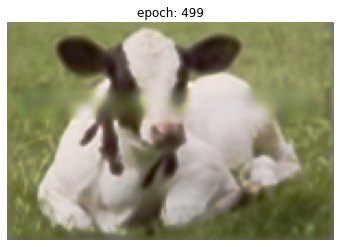

In [ ]:
g_loss_total = []
d_loss_total = []
dloss_mask_total = []
def train(img, epochs):

  img = img.astype(dtype='float32')
  mask = np.ones(input_shape,dtype="float32")
  mask[:][30:45][:] = 0.0
  inv_mask = np.zeros(input_shape,dtype="float32")
  inv_mask[:][30:45][:] = 1.0

  mask_img = img * mask
  inv_mask_img = img * inv_mask

  mask_img_in = []
  mask_img = preprocess_input(mask_img)
  mask_img_in.append(mask_img)
  mask_img_in = np.array(mask_img_in)
  
  img_in = []
  image = preprocess_input(img)
  img_in.append(image)
  img_in = np.array(img_in)

  inv_in = []
  inv_mask_img = preprocess_input(inv_mask_img)
  inv_in.append(inv_mask_img)
  inv_in = np.array(inv_in)
  
 

  for epoch in range(epochs):
    start = time.time()
    print("epoch %d" % epoch)
    gen_loss, disc_loss_nomask, disc_loss_invmask = train_step(img_in, mask_img_in, inv_in, inv_mask)
    g_loss_total.append(tf.math.reduce_mean(gen_loss))
    d_loss_total.append(tf.math.reduce_mean(disc_loss_nomask))
    dloss_mask_total.append(tf.math.reduce_mean(disc_loss_invmask))
    print ('Time for epoch {} is {} sec'.format(epoch , time.time()-start))
    #存檔G圖
    generate_and_save_images(generator,epoch,mask_img_in)

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)
  #灰轉RGB
  # generated_image = generator(x,training=False)
  #找最大值
  max = tf.reduce_max(predictions)
  #找最小
  min = tf.reduce_min(predictions)
  #讓他壓在範圍區間，最大255，找比例乘回去
  generated_image_re = (predictions + abs(min))*(255/(max+abs(min)))
  generated_image_re = tf.dtypes.cast(generated_image_re, dtype=tf.int32)

  plt.imshow(generated_image_re[0, :, :, :])
  plt.title('epoch: {:03d}'.format(epoch))
  plt.axis('off')
  plt.savefig('/content/drive/Shareddrives/paper/NM6104038_NM6101098_GAN_Group5/GAN_code/image/epoch{:04d}.png'.format(epoch))

train(img,500)



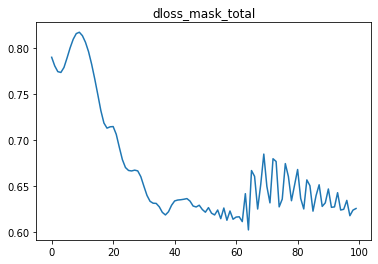

In [ ]:
plt.plot(dloss_mask_total)
plt.title("dloss_mask_total")
plt.savefig('/d_mask_loss.png')

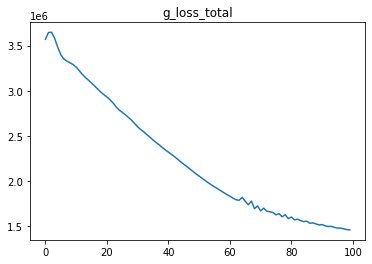

In [ ]:
plt.plot(g_loss_total)
plt.title("g_loss_total")
plt.savefig('/g_loss.png')

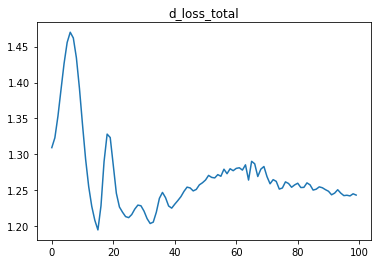

In [ ]:
plt.plot(d_loss_total)
plt.title("d_loss_total")
plt.savefig('/d_loss_total.png')